# Worksheet 02

Name: Tristan Lee 
UID: U24272030

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

You can't run the code as a whole until everything is finished.

b) What is a drawback of the bottom up approach?

This requires careful planning, so it may be time consuming.

c) What are 3 things you can do to have a better debugging experience?

Break code into parts/functions and test each of these parts as you write them. Do a mental trace of the code execution. If it takes too long, leave it overnight and come back to it tomorrow.

d) (Optional) Follow along with the live coding. You can write your code here:

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [2]:
import pandas as pd

df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [32]:
print("there are " +  str(len(df[df.isnull().any(axis=1)])) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [41]:
df = df.drop([col for col in df.columns if df[col].isnull().value_counts()[False] < len(df) - 200], axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [53]:
df['Sex'] = [0 if i == 'male' else 1 for i in df['Sex']]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [156]:
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = df.assign(
    a=df['Name'].str.split(',', expand=True)[1].apply(lambda x: x if '(' not in x else x[:x.index('(')]).apply(lambda x: x if '"' not in x else x[:x.index('"')]).str.split(expand=True)[1],
    b=df['Name'].str.split(',', expand=True)[1].apply(lambda x: x if '(' not in x else x[:x.index('(')]).apply(lambda x: x if '"' not in x else x[:x.index('"')]).str.split(n=2, expand=True)[2],
    c=df['Name'].str.split(',', expand=True)[0],
    d=df['Name'].str.split(',', expand=True)[1].apply(lambda x: x if '(' not in x else x[:x.index('(')]).apply(lambda x: x if '"' not in x else x[:x.index('"')]).str.split(expand=True)[0].str.strip('.')
)[['a','b','c','d']]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Complete the code below to replace all missing ages with the average age

In [159]:
df['Age'] = df['Age'].fillna(df['Age'].sum() / df['Age'].count())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

<AxesSubplot: xlabel='Survived'>

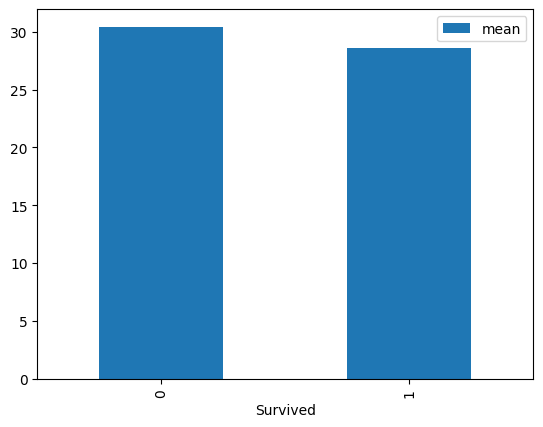

In [184]:
df.groupby(by=['Survived'])['Age'].aggregate(['mean']).plot.bar()

Those that survived were slightly younger on average, though it's hard to say if the difference is significant.